In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bri-data-hackathon-people-analytic/sample_submission.csv
/kaggle/input/bri-data-hackathon-people-analytic/train.csv
/kaggle/input/bri-data-hackathon-people-analytic/test.csv


In [98]:
import pandas as pd
import numpy as np
import pandas_profiling

# library untuk eksplorasi data
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk membagi data
from sklearn.model_selection import train_test_split

# library untuk evaluasi hasil prediksi
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

# library untuk bebrapa model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# library untuk tunning parameter
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# library untuk menggabungkan beberapa algoritme
from imblearn.pipeline import Pipeline
# library untuk menyeimbangkan data
from imblearn.over_sampling import SMOTE

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.compose import ColumnTransformer
import category_encoders as ce

from sklearn.calibration import CalibratedClassifierCV

In [99]:
pd.set_option('display.max_columns', None)

In [100]:
df_train = pd.read_csv('/kaggle/input/bri-data-hackathon-people-analytic/train.csv')
df_test = pd.read_csv('/kaggle/input/bri-data-hackathon-people-analytic/test.csv')

In [101]:
df_train.head(15)

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,3,1,2,level_4,2.32,1987,30.0,30,9,7,0,8,0,0,68.850000,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,3,2,1,level_4,3.25,2001,15.0,16,7,7,9,3,0,0,94.810000,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,1,0,1,level_5,3.23,2007,15.0,15,9,9,0,6,0,0,72.820000,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,0,0,0,level_3,0.00,2006,8.0,8,5,5,0,3,0,0,86.890000,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,1,0,1,NaN,NaN,NaN,7.0,7,4,6,11,2,1,1,95.170000,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached
5,JG04,1.75,PG03,1.75,6.25,RM_type_C,Permanent,Male,1984,Y,2,2,0,NaN,NaN,NaN,6.0,6,1,4,14,12,0,1,89.303333,87.16,2.0,achiev_100%-150%,achiev_< 50%,reached
6,JG04,1.75,PG03,1.75,1.33,RM_type_B,Permanent,Female,1986,N,0,0,0,level_4,3.65,2008,6.0,6,7,5,0,0,2,1,66.816667,70.43,0.0,achiev_50%-100%,achiev_< 50%,reached
7,JG04,1.75,PG03,1.75,5.92,RM_type_A,Permanent,Male,1984,Y,0,0,0,NaN,NaN,NaN,6.0,6,1,4,4,10,0,0,86.000000,81.32,2.0,achiev_50%-100%,achiev_< 50%,reached
8,JG04,2.42,PG03,2.42,1.50,RM_type_A,Permanent,Male,1987,Y,1,1,0,level_3,2.84,2008,6.0,6,3,2,1,8,5,0,110.430000,101.79,3.0,achiev_50%-100%,achiev_100%-150%,not_reached
9,JG04,1.75,PG03,1.75,1.50,RM_type_C,Permanent,Male,1988,Y,0,0,0,level_4,3.23,2011,5.0,5,3,3,2,5,1,0,92.126667,92.57,3.0,achiev_50%-100%,achiev_50%-100%,not_reached


In [102]:
df_test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,1.42,PG05,1.42,0.5,RM_type_C,Permanent,Female,1983,Y,2,1,1,level_3,3.75,2004,13.0,14,7,9,1,3,1,79.506667,94.17,1.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,1.58,PG03,1.58,2.0,RM_type_A,Permanent,Male,1988,N,0,0,0,level_4,3.07,2011,4.0,4,2,2,2,4,1,54.283333,42.97,0.0,Pencapaian < 50%,Pencapaian < 50%,reached
2,JG04,1.83,PG03,1.83,1.5,RM_type_A,Permanent,Male,1988,Y,1,0,1,level_4,3.23,2011,4.0,4,3,2,0,2,0,43.016667,44.28,0.0,achiev_50%-100%,achiev_< 50%,reached
3,JG05,8.00,PG06,5.00,1.5,RM_type_A,Permanent,Male,1973,Y,3,2,1,level_4,0.00,\N,22.0,22,8,5,11,3,0,74.390000,80.93,0.0,Pencapaian 50%-100%,Pencapaian < 50%,not reached
4,JG04,1.92,PG03,1.92,0.5,RM_type_A,Permanent,Female,1985,Y,1,1,0,level_3,3.86,2008,6.0,6,6,3,0,3,0,106.376667,109.09,3.0,Pencapaian 50%-100%,Pencapaian > 1.5,reached


# EDA

In [103]:
def understand(df):
    
    print("Data Dimension: \n",df.shape,"\n")
    df_summary = pd.DataFrame((df.isnull().sum()/df.shape[0])*100,columns=['missing'])
    df_summary.sort_values(by='missing',ascending=False,inplace=True)
    df_summary['missing num']=df.isnull().sum()
    df_summary['data types']=df.dtypes
    
    return df_summary[df_summary['missing']>0]

In [104]:
understand(df_train)

Data Dimension: 
 (22005, 30) 



,missing,missing num,data types
achievement_target_3,30.570325,6727,object
achievement_target_2,30.570325,6727,object
achievement_target_1,30.570325,6727,object
Achievement_above_100%_during3quartal,28.638946,6302,float64
Last_achievement_%,28.638946,6302,float64
Avg_achievement_%,28.579868,6289,float64
Education_level,16.396274,3608,object
GPA,15.919109,3503,float64
year_graduated,15.919109,3503,object
job_duration_as_permanent_worker,9.338787,2055,float64


In [105]:
understand(df_train).index

Data Dimension: 
 (22005, 30) 



Index(['achievement_target_3', 'achievement_target_2', 'achievement_target_1',
       'Achievement_above_100%_during3quartal', 'Last_achievement_%',
       'Avg_achievement_%', 'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'Employee_type'],
      dtype='object')

In [106]:
understand(df_test)

Data Dimension: 
 (6000, 29) 



,missing,missing num,data types


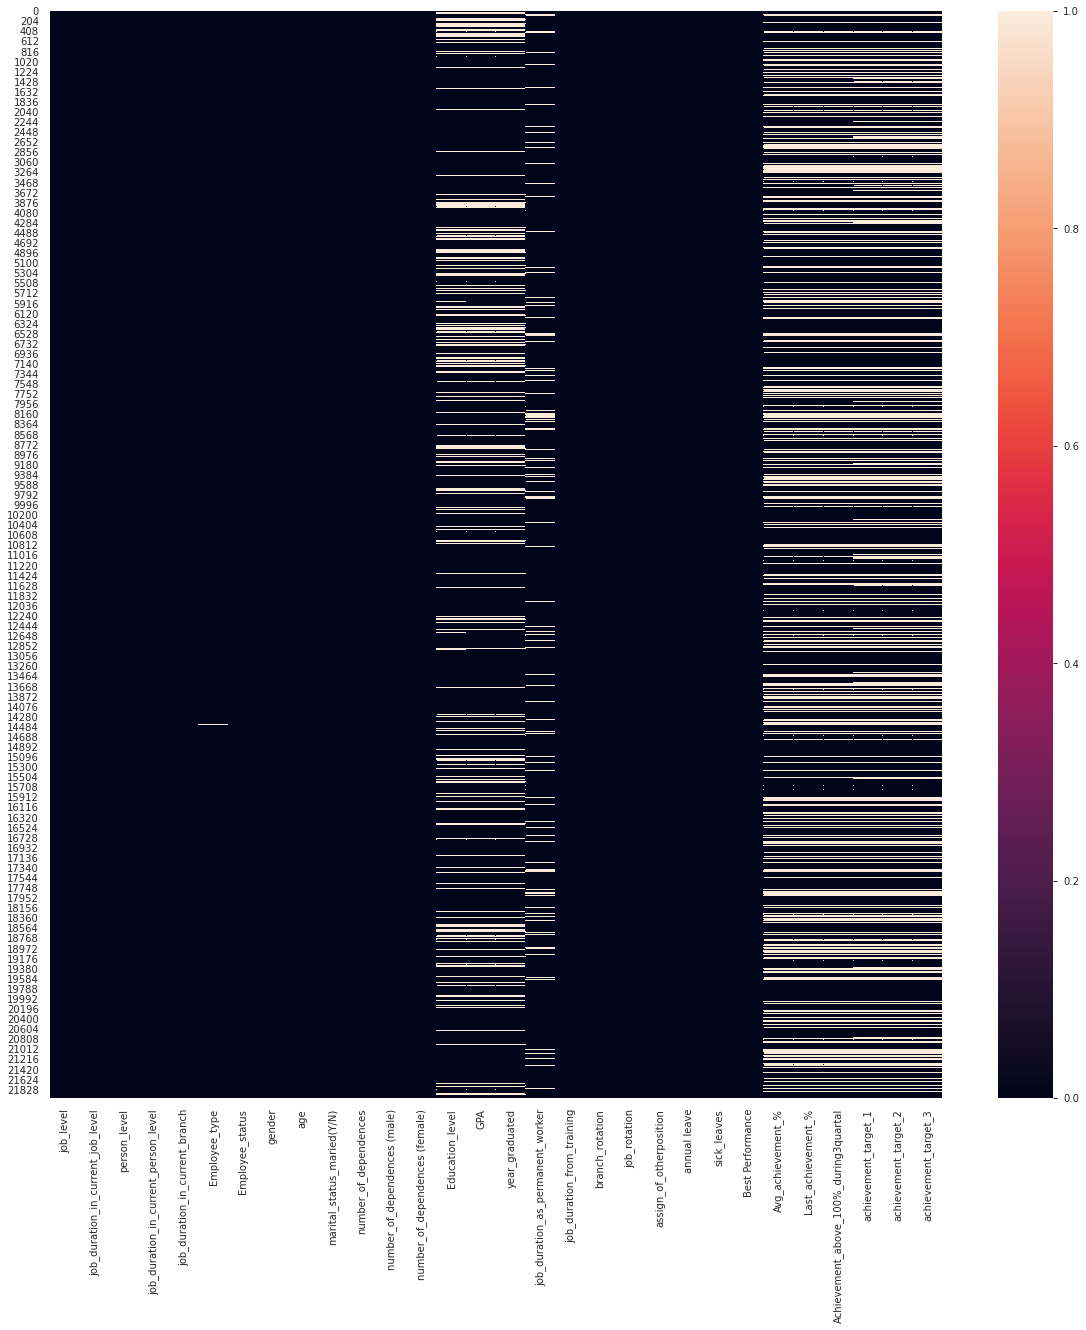

In [107]:
plt.figure(figsize = (20,20))
sns.heatmap(df_train.isnull())

In [108]:
df_train.dropna()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,3,1,2,level_4,2.32,1987,30.0,30,9,7,0,8,0,0,68.850000,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,3,2,1,level_4,3.25,2001,15.0,16,7,7,9,3,0,0,94.810000,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,1,0,1,level_5,3.23,2007,15.0,15,9,9,0,6,0,0,72.820000,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,0,0,0,level_3,0.00,2006,8.0,8,5,5,0,3,0,0,86.890000,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
6,JG04,1.75,PG03,1.75,1.33,RM_type_B,Permanent,Female,1986,N,0,0,0,level_4,3.65,2008,6.0,6,7,5,0,0,2,1,66.816667,70.43,0.0,achiev_50%-100%,achiev_< 50%,reached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21998,JG05,2.67,PG06,0.50,1.50,RM_type_A,Permanent,Female,1965,Y,2,1,1,level_4,0.00,1991,26.0,26,11,11,1,0,0,0,85.590000,89.37,1.0,Pencapaian 50%-100%,Pencapaian < 50%,reached
21999,JG04,1.92,PG03,1.92,2.17,RM_type_A,Permanent,Male,1987,Y,0,0,0,level_4,3.12,2009,5.0,5,2,2,0,9,2,0,68.230000,76.66,0.0,Pencapaian 50%-100%,Pencapaian < 50%,reached
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,1,0,1,level_4,2.84,2009,5.0,5,2,2,0,2,0,0,71.776667,75.53,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,2,0,2,level_4,3.10,2006,7.0,7,5,4,0,3,2,0,108.856667,111.65,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached


In [109]:
df_train[df_train['achievement_target_1'].isnull()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
53,JG04,1.50,PG03,1.50,1.92,RM_type_B,Permanent,Male,1989,Y,1,1,0,level_4,0.00,2013,2.0,2,1,2,0,1,1,0,20.0,20.0,0.0,NaN,NaN,NaN
59,JG03,0.58,PG01,0.58,0.58,RM_type_B,Contract,Male,1992,Y,0,0,0,level_4,3.22,0,NaN,1,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
67,JG03,0.83,PG01,0.83,0.83,RM_type_B,Contract,Male,1990,N,0,0,0,level_4,3.10,0,NaN,1,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
71,JG04,1.17,PG03,1.17,0.50,RM_type_A,Permanent,Male,1988,Y,0,0,0,level_3,0.00,0,2.0,2,2,3,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
75,JG03,0.83,PG01,0.83,0.75,RM_type_B,Contract,Male,1991,N,0,0,0,level_4,3.27,0,NaN,1,2,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21991,JG03,1.08,PG01,1.08,0.17,RM_type_B,Contract,Male,1993,N,0,0,0,level_4,3.26,2018,NaN,1,2,1,0,0,3,0,NaN,NaN,NaN,NaN,NaN,NaN
21992,JG04,0.67,PG03,0.67,0.17,RM_type_B,Permanent,Female,1990,Y,1,1,0,level_4,2.97,2012,1.0,1,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
21993,JG04,0.17,PG03,0.17,0.17,RM_type_A,Permanent,Male,1991,N,0,0,0,level_3,2.89,2014,1.0,1,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
21996,JG04,0.67,PG03,0.67,0.67,RM_type_B,Permanent,Male,1992,Y,1,0,1,level_4,3.33,2014,1.0,1,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df_train[df_train['job_duration_as_permanent_worker'].isnull()][['Employee_status','job_duration_as_permanent_worker']]

,Employee_status,job_duration_as_permanent_worker
59,Contract,NaN
67,Contract,NaN
75,Contract,NaN
82,Contract,NaN
83,Contract,NaN
...,...,...
21950,Contract,NaN
21959,Contract,NaN
21966,Contract,NaN
21991,Contract,NaN


> ## Object Var 

In [111]:
object_var = df_train.columns[df_train.dtypes == object]

In [112]:
for i in object_var:
    print(df_train[i].value_counts().sort_index(),'\n')

JG03     1990
JG04    19158
JG05      850
JG06        7
Name: job_level, dtype: int64 

PG01     1946
PG02       41
PG03    18342
PG04      807
PG05      364
PG06      478
PG07       24
PG08        3
Name: person_level, dtype: int64 

RM_type_A    11030
RM_type_B    10211
RM_type_C      752
Name: Employee_type, dtype: int64 

Contract      2055
Permanent    19950
Name: Employee_status, dtype: int64 

Female     5670
Male      16335
Name: gender, dtype: int64 

N     6346
Y    15659
Name: marital_status_maried(Y/N), dtype: int64 

level_0       16
level_1      192
level_2        8
level_3     2804
level_4    15313
level_5       64
Name: Education_level, dtype: int64 

-          4
0        440
102        1
1983       3
1984       2
1985       8
1986       8
1987      15
1988      12
1989      10
1990      11
1991      14
1992      18
1993      22
1994      27
1995      32
1996      41
1997      15
1998      35
1999      42
2000      71
2001     122
2002     198
2003     253
2004     297

In [113]:
for i in object_var:
    print(df_test[i].value_counts().sort_index(),'\n')

JG03      16
JG04    5592
JG05     392
Name: job_level, dtype: int64 

PG01      12
PG02       4
PG03    5154
PG04     437
PG05     151
PG06     226
PG07      16
Name: person_level, dtype: int64 

RM_type_A    3920
RM_type_B    1815
RM_type_C     265
Name: Employee_type, dtype: int64 

Permanent    6000
Name: Employee_status, dtype: int64 

Female    1593
Male      4407
Name: gender, dtype: int64 

N     906
Y    5094
Name: marital_status_maried(Y/N), dtype: int64 

level_0       4
level_1      98
level_2       1
level_3     923
level_4    4948
level_5      26
Name: Education_level, dtype: int64 

.         1
0        81
1016      1
1982      1
1983      1
1984      4
1985      8
1986     12
1987      8
1988     10
1989      9
1990      4
1991      4
1992      5
1993      9
1994     14
1995     13
1996     24
1997      7
1998     15
1999     25
2000     33
2001     68
2002    102
2003    137
2004    146
2005    161
2006    209
2007    331
2008    529
2009    664
2010    779
2011    893

> ## Year

In [114]:
df_train['year_graduated'].value_counts()

2013    2552
2011    2290
2012    2225
2014    2031
2010    1872
2009    1365
2008    1170
2015     946
2007     703
0        440
2006     433
2016     417
2005     314
2004     297
2003     253
2017     212
2002     198
2001     122
\N        87
2018      72
2000      71
9999      66
1999      42
1996      41
1998      35
1995      32
1994      27
1993      22
1992      18
2999      17
1987      15
1997      15
1991      14
1988      12
2019      12
1990      11
1989      10
1985       8
1986       8
2201       5
-          4
1983       3
2200       3
____       2
1984       2
201        2
102        1
2020       1
2044       1
3016       1
9464       1
2031       1
Name: year_graduated, dtype: int64

In [115]:
df_train['year_graduated'].value_counts().sort_index()

-          4
0        440
102        1
1983       3
1984       2
1985       8
1986       8
1987      15
1988      12
1989      10
1990      11
1991      14
1992      18
1993      22
1994      27
1995      32
1996      41
1997      15
1998      35
1999      42
2000      71
2001     122
2002     198
2003     253
2004     297
2005     314
2006     433
2007     703
2008    1170
2009    1365
201        2
2010    1872
2011    2290
2012    2225
2013    2552
2014    2031
2015     946
2016     417
2017     212
2018      72
2019      12
2020       1
2031       1
2044       1
2200       3
2201       5
2999      17
3016       1
9464       1
9999      66
\N        87
____       2
Name: year_graduated, dtype: int64

In [116]:
df_test['year_graduated'].value_counts().sort_index()

.         1
0        81
1016      1
1982      1
1983      1
1984      4
1985      8
1986     12
1987      8
1988     10
1989      9
1990      4
1991      4
1992      5
1993      9
1994     14
1995     13
1996     24
1997      7
1998     15
1999     25
2000     33
2001     68
2002    102
2003    137
2004    146
2005    161
2006    209
2007    331
2008    529
2009    664
2010    779
2011    893
2012    707
2013    483
2014    301
2015     76
2016     19
2017     13
2018      5
2019      3
207       1
209       1
2201      4
2999      7
3.05      1
3.18      1
3013      1
9999     38
\N       31
Name: year_graduated, dtype: int64

> ## Numeric Var

In [117]:
numeric_var = df_train.columns[df_train.dtypes != object]

In [118]:
numeric_var

Index(['job_duration_in_current_job_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)', 'GPA',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Best Performance', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal'],
      dtype='object')

In [119]:
df_train[numeric_var].describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,number_of_dependences (male),number_of_dependences (female),GPA,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal
count,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,18502.000000,19950.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,15716.000000,15703.000000,15703.000000
mean,1.733252,1.555544,1.088203,1987.398682,0.746239,0.379232,0.366917,2.994603,4.872481,4.546876,2.889571,2.832265,0.818723,2.794138,0.898069,0.121245,66.344676,71.420847,0.682991
std,1.422136,0.954620,0.839882,4.274737,0.840026,0.606961,0.597422,11.699025,4.500514,4.519389,2.193424,1.751125,2.250188,2.822423,2.848540,0.326419,23.253675,24.095520,1.107861
min,0.000000,0.000000,0.000000,1963.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.260000,0.000000
25%,1.170000,1.080000,0.500000,1986.000000,0.000000,0.000000,0.000000,2.810000,3.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,51.675000,55.935000,0.000000
50%,1.580000,1.500000,0.830000,1988.000000,1.000000,0.000000,0.000000,3.090000,4.000000,4.000000,2.000000,2.000000,0.000000,3.000000,0.000000,0.000000,66.310833,71.410000,0.000000
75%,1.920000,1.830000,1.500000,1990.000000,1.000000,1.000000,1.000000,3.300000,6.000000,5.000000,3.000000,3.000000,0.000000,5.000000,1.000000,0.000000,81.930833,88.350000,1.000000
max,8.750000,8.000000,7.500000,2017.000000,7.000000,4.000000,4.000000,381.000000,34.000000,35.000000,22.000000,15.000000,54.000000,41.000000,132.000000,1.000000,129.010000,130.000000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f235c4bb910>,
      dtype=object)

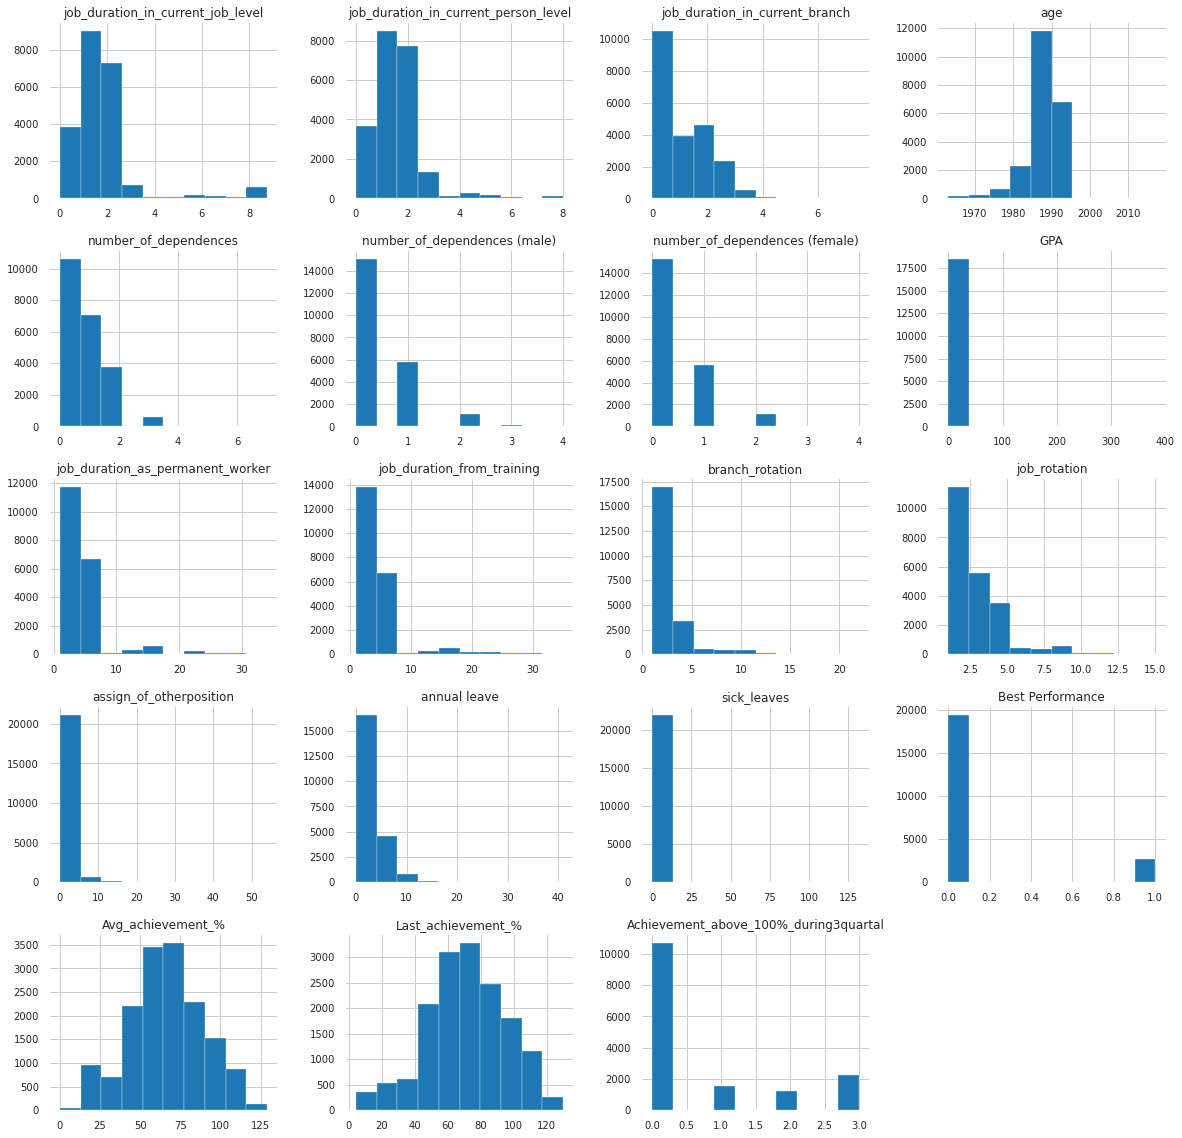

In [120]:
df_train[numeric_var].hist(figsize = (20,20))

In [121]:
numeric_discrete = ['age', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)', 'GPA',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Achievement_above_100%_during3quartal']

In [122]:
for i in numeric_discrete:
    print(df_train[i].value_counts(), '\n')

1989    3036
1988    2973
1990    2656
1987    2541
1991    1970
1986    1926
1985    1303
1992    1249
1984     879
1993     641
1983     563
1982     338
1981     273
1980     252
1994     250
1979     175
1978     157
1977     107
1976      86
1975      65
1995      61
1968      55
1974      54
1973      54
1970      51
1971      50
1972      48
1969      44
1965      36
1967      35
1964      27
1966      27
1996      12
1963       6
1997       3
2017       1
1998       1
Name: age, dtype: int64 

0    10592
1     7050
2     3738
3      609
4       14
7        1
5        1
Name: number_of_dependences, dtype: int64 

0    15009
1     5758
2     1130
3      105
4        3
Name: number_of_dependences (male), dtype: int64 

0    15217
1     5584
2     1125
3       76
4        3
Name: number_of_dependences (female), dtype: int64 

0.00     3853
3.00      541
3.01      353
3.10      296
3.14      294
         ... 
8.41        1
4.19        1
8.69        1
8.29        1
32.12       1
Name

> ## Age

In [123]:
df_train['age'].value_counts()

1989    3036
1988    2973
1990    2656
1987    2541
1991    1970
1986    1926
1985    1303
1992    1249
1984     879
1993     641
1983     563
1982     338
1981     273
1980     252
1994     250
1979     175
1978     157
1977     107
1976      86
1975      65
1995      61
1968      55
1974      54
1973      54
1970      51
1971      50
1972      48
1969      44
1965      36
1967      35
1964      27
1966      27
1996      12
1963       6
1997       3
2017       1
1998       1
Name: age, dtype: int64

> ## GPA

In [124]:
df_train['GPA'].value_counts()

0.00     3853
3.00      541
3.01      353
3.10      296
3.14      294
         ... 
8.41        1
4.19        1
8.69        1
8.29        1
32.12       1
Name: GPA, Length: 241, dtype: int64

In [125]:
df_train['GPA'].describe()

count    18502.000000
mean         2.994603
std         11.699025
min          0.000000
25%          2.810000
50%          3.090000
75%          3.300000
max        381.000000
Name: GPA, dtype: float64

In [126]:
np.sort(df_train[~df_train['GPA'].isnull()]['GPA'])

array([  0.,   0.,   0., ..., 362., 378., 381.])

# Anomaly

> ## Eduacation

In [127]:
df_train['Education_level'].value_counts()

level_4    15313
level_3     2804
level_1      192
level_5       64
level_0       16
level_2        8
Name: Education_level, dtype: int64

In [128]:
df_train['Education_level'].isnull().sum()

3608

In [129]:
df_train[['Education_level','GPA']][df_train['Education_level'] == 'level_0']

,Education_level,GPA
1333,level_0,0.00
1439,level_0,0.00
1477,level_0,0.00
1505,level_0,0.00
1552,level_0,0.00
2582,level_0,0.00
2618,level_0,0.00
2619,level_0,0.00
2649,level_0,0.00
2892,level_0,0.00


In [130]:
df_train[['Education_level','GPA']][df_train['Education_level'] == 'level_1'].describe()

,GPA
count,192.000000
mean,4.942865
std,12.958200
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,73.000000


In [131]:
df_train[['Education_level','GPA']][df_train['GPA']>50]

,Education_level,GPA
1328,level_4,299.00
1341,level_4,285.00
1342,level_4,312.00
1346,level_4,315.00
1347,level_4,313.00
1352,level_4,301.00
1356,level_4,327.00
1357,level_5,362.00
1364,level_4,331.00
2204,level_4,353.00


In [132]:
df_train[['Education_level','GPA']][df_train['GPA']>4]

,Education_level,GPA
40,level_1,7.28
97,level_1,48.61
204,level_1,45.00
406,level_1,45.29
684,level_1,32.12
...,...,...
20170,level_4,378.00
20774,level_1,13.43
20804,level_4,334.00
21611,level_1,47.35


In [133]:
df_test[['Education_level','GPA']][df_test['GPA']>4]

,Education_level,GPA
516,level_1,6.22
619,level_5,336.00
811,level_1,44.56
1110,level_1,30.73
1223,level_4,280.00
1307,level_1,6.60
1444,level_4,282.00
1602,level_1,7.50
1798,level_1,7.20
1959,level_1,31.59


> ## Age

In [134]:
df_test['age'].value_counts()

1988    849
1987    758
1989    720
1986    699
1985    526
1990    512
1984    353
1991    267
1983    226
1982    153
1981    137
1980    118
1979    111
1992     97
1978     68
1977     50
1976     33
1993     32
1967     31
1975     31
1971     29
1973     25
1968     24
1974     24
1972     23
1969     23
1970     22
1965     17
1964     15
1966     14
1994      6
1963      3
1996      2
1995      2
Name: age, dtype: int64

In [135]:
df_train['age'].value_counts()

1989    3036
1988    2973
1990    2656
1987    2541
1991    1970
1986    1926
1985    1303
1992    1249
1984     879
1993     641
1983     563
1982     338
1981     273
1980     252
1994     250
1979     175
1978     157
1977     107
1976      86
1975      65
1995      61
1968      55
1974      54
1973      54
1970      51
1971      50
1972      48
1969      44
1965      36
1967      35
1964      27
1966      27
1996      12
1963       6
1997       3
2017       1
1998       1
Name: age, dtype: int64

In [136]:
df_train[df_train['age'] == 2017]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
6324,JG04,1.5,PG03,1.5,1.92,RM_type_A,Permanent,Male,2017,Y,0,0,0,level_3,3.46,2011,3.0,3,2,3,0,7,0,0,50.72,38.68,1.0,achiev_50%-100%,achiev_50%-100%,reached


> ## Year Graduated

In [137]:
df_train['year_graduated'].value_counts()

2013    2552
2011    2290
2012    2225
2014    2031
2010    1872
2009    1365
2008    1170
2015     946
2007     703
0        440
2006     433
2016     417
2005     314
2004     297
2003     253
2017     212
2002     198
2001     122
\N        87
2018      72
2000      71
9999      66
1999      42
1996      41
1998      35
1995      32
1994      27
1993      22
1992      18
2999      17
1987      15
1997      15
1991      14
1988      12
2019      12
1990      11
1989      10
1985       8
1986       8
2201       5
-          4
1983       3
2200       3
____       2
1984       2
201        2
102        1
2020       1
2044       1
3016       1
9464       1
2031       1
Name: year_graduated, dtype: int64

> ## dependents

In [138]:
df_train.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'Employee_status',
       'gender', 'age', 'marital_status_maried(Y/N)', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Best Performance', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'achievement_target_1', 'achievement_target_2', 'achievement_target_3'],
      dtype='object')

In [139]:
df_train[df_train['number_of_dependences'] != (df_train['number_of_dependences (male)']+df_train['number_of_dependences (female)'])][['number_of_dependences','number_of_dependences (male)','number_of_dependences (female)']]

,number_of_dependences,number_of_dependences (male),number_of_dependences (female)
7780,1,0,0
16871,1,0,0


> ## Leave

In [140]:
df_train[['annual leave','sick_leaves']].describe()

,annual leave,sick_leaves
count,22005.000000,22005.000000
mean,2.794138,0.898069
std,2.822423,2.848540
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,41.000000,132.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f234672d110>,
      dtype=object)

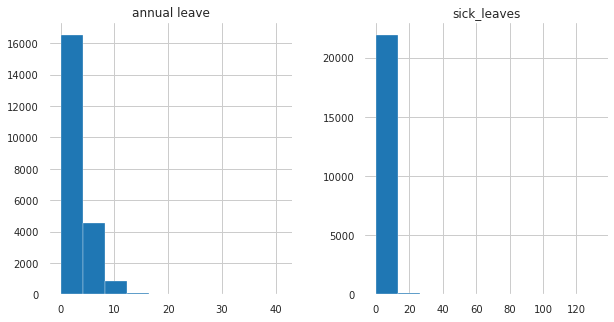

In [141]:
df_train[['annual leave','sick_leaves']].hist(figsize = (10,5))

In [142]:
df_train[['annual leave','sick_leaves']].sort_values(by = 'annual leave').tail(20)

,annual leave,sick_leaves
6610,16,6
12401,16,0
5549,16,5
8303,16,9
12413,16,0
13074,16,2
9041,16,0
8263,16,0
5566,17,0
12213,17,2


In [143]:
df_train[['annual leave','sick_leaves']].sort_values(by = 'sick_leaves').tail(20)

,annual leave,sick_leaves
3567,0,35
9594,5,36
10717,2,36
8549,1,37
21426,2,37
514,0,39
13700,7,44
13846,1,46
8931,0,47
19287,2,49


> ## Achievement

In [144]:
var_achievement = ['Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'achievement_target_1', 'achievement_target_2', 'achievement_target_3']

In [145]:
df_train[var_achievement]

,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,68.850000,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,94.810000,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,72.820000,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,86.890000,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,95.170000,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached
...,...,...,...,...,...,...
22000,71.776667,75.53,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22001,NaN,NaN,NaN,NaN,NaN,NaN
22002,108.856667,111.65,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22003,76.366667,79.65,0.0,Pencapaian 100%-150%,Pencapaian 50%-100%,not reached


# Data Prepaparation

In [146]:
df_train_prep1 = df_train.copy()
df_test_prep1 = df_test.copy()

In [147]:
def achievement_target1(x):
    if x == 'Pencapaian 50%-100%':
        return 'achiev_50%-100%'
    elif x == 'Pencapaian 100%-150%':
        return 'achiev_100%-150%'
    elif x == 'Pencapaian < 50%':
        return 'achiev_< 50%'
    elif x == 'Pencapaian > 1.5':
        return 'achiev_> 1.5'
    else:
        return x
    
def achievement_target2(x):
    if x == 'Pencapaian 50%-100%':
        return 'achiev_50%-100%'
    elif x == 'Pencapaian 100%-150%':
        return 'achiev_100%-150%'
    elif x == 'Pencapaian < 50%':
        return 'achiev_< 50%'
    elif x == 'Pencapaian > 1.5':
        return 'achiev_> 1.5'
    else:
        return x
    
def achievement_target3(x):
    if x == 'not reached':
        return 'not_reached'
    else:
        return x

In [148]:
year_grad = []

x = 1960

while(x < 2020):
    year_grad.append(str(x))
    x += 1

## Training Set

ACHIEVEMENT

In [149]:
df_train_prep1['achievement_target_1'] = df_train_prep1['achievement_target_1'].apply(achievement_target1)
df_train_prep1['achievement_target_2'] = df_train_prep1['achievement_target_2'].apply(achievement_target2)
df_train_prep1['achievement_target_3'] = df_train_prep1['achievement_target_3'].apply(achievement_target3)

In [150]:
df_train_prep1['achievement_target_1'].value_counts()

achiev_50%-100%           9210
achiev_100%-150%          3004
achiev_< 50%              2240
achiev_> 1.5               646
Tidak diberikan target     178
Name: achievement_target_1, dtype: int64

In [151]:
df_train['achievement_target_1'].value_counts()

achiev_50%-100%           7679
achiev_100%-150%          2519
achiev_< 50%              2065
Pencapaian 50%-100%       1531
achiev_> 1.5               597
Pencapaian 100%-150%       485
Tidak diberikan target     178
Pencapaian < 50%           175
Pencapaian > 1.5            49
Name: achievement_target_1, dtype: int64

YEAR GRADUATED

In [152]:
df_train_prep1['year_graduated'] = np.where(df_train_prep1['year_graduated'].isin(year_grad),df_train_prep1['year_graduated'],3000)
df_train_prep1['year_graduated'] = df_train_prep1['year_graduated'].astype(int)

EDUCATION LEVEL

In [153]:
# df_train_prep1['Education_level'] = np.where(df_train_prep1['Education_level'].isnull() & (df_train_prep1['GPA'] == 0),'other b',df_train_prep1['Education_level'])
# df_train_prep1['Education_level'] = np.where(df_train['Education_level'].isnull() & df_train['GPA'] > 4,'other a',df_train['Education_level'])

In [154]:
df_train_prep1['Education_level'] = np.where(df_train['Education_level'].isnull() & df_train['GPA'].isnull(),'other b',df_train['Education_level'])
df_train_prep1['Education_level'] = np.where(df_train_prep1['Education_level'].isnull() & (df_train_prep1['GPA'] == 0),'other b',df_train_prep1['Education_level'])
df_train_prep1['Education_level'] = np.where(df_train_prep1['Education_level'].isnull(),'other a',df_train_prep1['Education_level'])

In [155]:
df_train_prep1['Education_level'].value_counts()

level_4    15313
other b     3580
level_3     2804
level_1      192
level_5       64
other a       28
level_0       16
level_2        8
Name: Education_level, dtype: int64

GPA

In [156]:
df_train_prep1['GPA'] = np.where(df_train['GPA']>100,df_train['GPA']/100,df_train['GPA'])
df_train_prep1['GPA'] = np.where(df_train_prep1['Education_level'].isin(['level_0','level_1']),0,df_train_prep1['GPA'])
df_train_prep1['GPA'] = np.where(df_train_prep1['GPA'].isnull(),0,df_train_prep1['GPA'])

NEW VARIABLE

In [157]:
df_train_prep1['total leave'] = df_train_prep1['annual leave'] + df_train_prep1['sick_leaves']

RESULT

In [158]:
df_train_prep1.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,total leave
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,3,1,2,level_4,2.32,1987,30.0,30,9,7,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached,8
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,3,2,1,level_4,3.25,2001,15.0,16,7,7,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached,3
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,1,0,1,level_5,3.23,2007,15.0,15,9,9,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached,6
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,0,0,0,level_3,0.00,2006,8.0,8,5,5,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached,3
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,1,0,1,other b,0.00,3000,7.0,7,4,6,11,2,1,1,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached,3


> ## Test Set

In [159]:
df_test_prep1['achievement_target_1'] = df_test['achievement_target_1'].apply(achievement_target1)
df_test_prep1['achievement_target_2'] = df_test['achievement_target_2'].apply(achievement_target2)
df_test_prep1['achievement_target_3'] = df_test['achievement_target_3'].apply(achievement_target3)

In [160]:
df_test_prep1['year_graduated'] = np.where(df_test['year_graduated'].isin(year_grad),df_test['year_graduated'],3000)
df_test_prep1['year_graduated'] = df_test_prep1['year_graduated'].astype(int)

In [161]:
df_test_prep1['Education_level'] = np.where(df_test['Education_level'].isnull() & df_test['GPA'].isnull(),'other b',df_test['Education_level'])
df_test_prep1['Education_level'] = np.where(df_test_prep1['Education_level'].isnull() & (df_test_prep1['GPA'] == 0),'other b',df_test_prep1['Education_level'])
df_test_prep1['Education_level'] = np.where(df_test_prep1['Education_level'].isnull(),'other a',df_test_prep1['Education_level'])

In [162]:
df_test_prep1['GPA'] = np.where(df_test['GPA']>100,df_test['GPA']/100,df_test['GPA'])
df_test_prep1['GPA'] = np.where(df_test_prep1['Education_level'].isin(['level_0','level_1']),0,df_test_prep1['GPA'])
df_test_prep1['GPA'] = np.where(df_test_prep1['GPA'].isnull(),0,df_test_prep1['GPA'])

In [163]:
# new_leaves
df_test_prep1['total leave'] = df_test_prep1['annual leave'] + df_test_prep1['sick_leaves']

In [164]:
df_test_prep1.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,total leave
0,JG05,1.42,PG05,1.42,0.5,RM_type_C,Permanent,Female,1983,Y,2,1,1,level_3,3.75,2004,13.0,14,7,9,1,3,1,79.506667,94.17,1.0,achiev_50%-100%,achiev_< 50%,reached,4
1,JG04,1.58,PG03,1.58,2.0,RM_type_A,Permanent,Male,1988,N,0,0,0,level_4,3.07,2011,4.0,4,2,2,2,4,1,54.283333,42.97,0.0,achiev_< 50%,achiev_< 50%,reached,5
2,JG04,1.83,PG03,1.83,1.5,RM_type_A,Permanent,Male,1988,Y,1,0,1,level_4,3.23,2011,4.0,4,3,2,0,2,0,43.016667,44.28,0.0,achiev_50%-100%,achiev_< 50%,reached,2
3,JG05,8.00,PG06,5.00,1.5,RM_type_A,Permanent,Male,1973,Y,3,2,1,level_4,0.00,3000,22.0,22,8,5,11,3,0,74.390000,80.93,0.0,achiev_50%-100%,achiev_< 50%,not_reached,3
4,JG04,1.92,PG03,1.92,0.5,RM_type_A,Permanent,Female,1985,Y,1,1,0,level_3,3.86,2008,6.0,6,6,3,0,3,0,106.376667,109.09,3.0,achiev_50%-100%,achiev_> 1.5,reached,3


# Feature Engineering

FE New variabel

In [ ]:
# new_leaves (example)
df_train_prep1['total leave'] = df_train_prep1['annual leave'] + df_train_prep1['sick_leaves']
df_test_prep1['total leave'] = df_test_prep1['annual leave'] + df_test_prep1['sick_leaves']

# another ex. total transaksi/number of transaksion + - * /, ---> rule

FE SKLEARN

In [165]:
df_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,3,1,2,level_4,2.32,1987,30.0,30,9,7,0,8,0,0,68.850000,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,3,2,1,level_4,3.25,2001,15.0,16,7,7,9,3,0,0,94.810000,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,1,0,1,level_5,3.23,2007,15.0,15,9,9,0,6,0,0,72.820000,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,0,0,0,level_3,0.00,2006,8.0,8,5,5,0,3,0,0,86.890000,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,1,0,1,NaN,NaN,NaN,7.0,7,4,6,11,2,1,1,95.170000,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,1,0,1,level_4,2.84,2009,5.0,5,2,2,0,2,0,0,71.776667,75.53,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22001,JG03,0.42,PG01,0.42,0.42,RM_type_B,Contract,Male,1991,N,0,0,0,level_4,3.28,2014,NaN,1,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,2,0,2,level_4,3.10,2006,7.0,7,5,4,0,3,2,0,108.856667,111.65,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22003,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1988,Y,1,0,1,level_4,3.69,2010,6.0,6,5,4,0,13,0,0,76.366667,79.65,0.0,Pencapaian 100%-150%,Pencapaian 50%-100%,not reached


In [166]:
df_train_prep1.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'Employee_status',
       'gender', 'age', 'marital_status_maried(Y/N)', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Best Performance', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'achievement_target_1', 'achievement_target_2', 'achievement_target_3',
       'total leave'],
      dtype='object')

In [167]:
object_var

Index(['job_level', 'person_level', 'Employee_type', 'Employee_status',
       'gender', 'marital_status_maried(Y/N)', 'Education_level',
       'year_graduated', 'achievement_target_1', 'achievement_target_2',
       'achievement_target_3'],
      dtype='object')

In [168]:
numeric_var

Index(['job_duration_in_current_job_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)', 'GPA',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Best Performance', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal'],
      dtype='object')

In [169]:
# sns.pairplot(df_train[numeric_var+['Best Performance']], hue = 'Best Performance')

In [170]:
one_hot_var = [
#     'job_level', 
#     'person_level', 
    'Employee_type', 
    'Employee_status',   
    'gender', 
    'marital_status_maried(Y/N)', 
#     'Education_level',
    'achievement_target_1', 
    'achievement_target_2',
    'achievement_target_3']

ordinal_val = [
    'job_level',
    'person_level',
    'Education_level'
#     'achievement_target_1', 
#     'achievement_target_2'
]

numeric_var = [
    'job_duration_in_current_job_level',   
    'job_duration_in_current_person_level',
    'job_duration_in_current_branch', 
    'age', 
    'number_of_dependences',
    'number_of_dependences (male)', 
    'number_of_dependences (female)', 
    'GPA',   
    'job_duration_as_permanent_worker', 
    'job_duration_from_training',   
    'branch_rotation', 
    'job_rotation', 
    'assign_of_otherposition',   
    'annual leave', 
    'sick_leaves',
    'Avg_achievement_%',
    'Last_achievement_%', 
    'Achievement_above_100%_during3quartal'] + ['year_graduated','total leave']

In [171]:
ordinal_mapping = [
    {'col':'job_level',
    'mapping':{None:0,'JG04':1,'JG05':2,'JG03':3,'JG06':4}},
    {'col':'person_level',
    'mapping':{None:0,'PG01':1,'PG02':2,'PG03':3,'PG04':4, 'PG05':5, 'PG06':6, 'PG07':7, 'PG08':8}},
    {'col':'Education_level',
    'mapping':{None:0,'level_0':1,'level_1':2,'level_2':3,'level_3':4, 'level_4':5, 'level_5':6, 'level_6':7, 'level_7':8}}    
    ]

ordinal_encoder = ce.OrdinalEncoder(cols = ['job_level','person_level','Education_level'],mapping = ordinal_mapping)

one_hot_encoder_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'NC')),
                                    ('one hot encoder',OneHotEncoder(drop = 'first'))
])

numerical_pipeline = SimpleImputer(strategy = 'constant',fill_value = 0)

transformer = ColumnTransformer([
    ('one hot encoder',one_hot_encoder_pipeline,one_hot_var),
    ('ordinal encoder',ordinal_encoder,ordinal_val),
    ('numerical_pipeline',numerical_pipeline,numeric_var)
])

# Data Splitting

In [172]:
var_x = numeric_var + one_hot_var + ordinal_val

X = df_train_prep1[var_x]
X_sub = df_test_prep1[var_x]
y = df_train_prep1['Best Performance']

In [173]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X,y, stratify = y, test_size = 2000, random_state = 200)
X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, stratify = y_trainval, test_size = 2000, random_state = 200)

> # Model (Benchmark)

In [174]:
# ?XGBClassifier

In [175]:
model = XGBClassifier(
    learning_rate = 0.05,
    n_estimators = 1000,
    max_depth = 5,
    min_child_weight = 4,
    gamma = 25,
    subsample = 0.7,
    colsample_bynode = 0.4,
    reg_alpha= 0.005,
    objective= 'binary:logistic',
    n_jobs = -1,
    seed=27)

# model = CalibratedClassifierCV(model)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

In [176]:
estimator.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('one hot encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('one hot '
                                                                   'encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Employee_type',
                                                   'Employee_status', 'gender',
                                                   'marital_status_maried(Y/N)',
                                                   'achievement_target_1',
                                                   'achieveme

In [177]:
y_prob_train = estimator.predict_proba(X_train)[:,1]
y_pred_train = np.where(y_prob_train > 0.13, 1, 0)

print('auc',roc_auc_score(y_train,y_prob_train),'\n')
print('classification report \n', classification_report(y_train,y_pred_train))

auc 0.6602895485292661 

classification report 
               precision    recall  f1-score   support

           0       0.97      0.28      0.43     15822
           1       0.15      0.94      0.26      2183

    accuracy                           0.36     18005
   macro avg       0.56      0.61      0.35     18005
weighted avg       0.87      0.36      0.41     18005



In [178]:
y_prob_val = estimator.predict_proba(X_val)[:,1]
y_pred_val = np.where(y_prob_val > 0.13, 1, 0)

print('auc',roc_auc_score(y_val,y_prob_val),'\n')
print('classification report \n', classification_report(y_val,y_pred_val))

auc 0.6461596295593639 

classification report 
               precision    recall  f1-score   support

           0       0.97      0.29      0.45      1757
           1       0.15      0.93      0.26       243

    accuracy                           0.37      2000
   macro avg       0.56      0.61      0.36      2000
weighted avg       0.87      0.37      0.43      2000



In [179]:
y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

auc 0.6375224475596799 

classification report 
               precision    recall  f1-score   support

           0       0.97      0.27      0.42      1758
           1       0.15      0.93      0.26       242

    accuracy                           0.35      2000
   macro avg       0.56      0.60      0.34      2000
weighted avg       0.87      0.35      0.40      2000



# Model Selection

In [180]:
model = XGBClassifier(
    learning_rate = 0.05,
    n_estimators = 1000,
    max_depth = 5,
    min_child_weight = 4,
    gamma= 30,
    subsample = 0.7,
    colsample_bynode = 0.4,
    reg_alpha= 0.005,
    objective= 'binary:logistic',
    n_jobs = -1,
    seed=27)



# model = CalibratedClassifierCV(model)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

skfold = StratifiedKFold(n_splits = 5)

hyperparam_space = {
    'clf':[model, ]
}

grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

# Hyperparameter Tuning

In [190]:
model = XGBClassifier(
    learning_rate = 0.05,
    n_estimators = 1000,
    max_depth = 5,
#     min_child_weight = 4,
    gamma= 30,
    subsample = 0.7,
    colsample_bynode = 0.4,
#     reg_alpha= 0.005,
    objective= 'binary:logistic',
    n_jobs = -1,
    seed=27)

# model = CalibratedClassifierCV(model)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

skfold = StratifiedKFold(n_splits = 5)

hyperparam_space = {
#     'clf__max_depth':[3,4,5,6],
    'clf__gamma':[0,10,20,25,30],
#     'clf__subsample':[0.5,0.6,0.7,0.8,0.9],
    'clf__colsample_bynode':[0.3,0.4,0.6,0.8]
}

grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

In [191]:
grid_search.fit(X_trainval, y_trainval)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='NC',
                                                                                                        strategy='constant')),
                                                                                         ('one '
                                                                                          'hot '
                                                                                

In [192]:
grid_search.best_params_

{'clf__colsample_bynode': 0.6, 'clf__gamma': 10}

In [193]:
grid_search.best_score_

0.6614493684551366

In [199]:
estimator = grid_search.best_estimator_
estimator.fit(X_trainval,y_trainval)

y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


auc 0.6518700815163737 

classification report 
               precision    recall  f1-score   support

           0       0.93      0.53      0.67      1758
           1       0.17      0.71      0.28       242

    accuracy                           0.55      2000
   macro avg       0.55      0.62      0.47      2000
weighted avg       0.84      0.55      0.63      2000



# Hyperparameter Tuning (2nd Scenario)

1

In [255]:
rates = 0.1

In [214]:
model = XGBClassifier(
    learning_rate = rates,
    n_estimators = 100,
    max_depth = 5,
    min_child_weight = 6,
    gamma= 30,
    subsample = 0.7,
    colsample_bynode = 0.4,
    reg_alpha= 0.005,
    objective= 'binary:logistic',
    n_jobs = -1,
    seed=27)

# model = CalibratedClassifierCV(model)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

skfold = StratifiedKFold(n_splits = 4)

hyperparam_space = {
    'clf__n_estimators':[25,50,100,200,400]
}

grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

In [215]:
grid_search.fit(X_trainval, y_trainval)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='NC',
                                                                                                        strategy='constant')),
                                                                                         ('one '
                                                                                          'hot '
                                                                                

In [216]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__n_estimators': 200}
0.6471426712896813


In [217]:
estimator = grid_search.best_estimator_
estimator.fit(X_trainval,y_trainval)

y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


auc 0.6370852490151281 

classification report 
               precision    recall  f1-score   support

           0       0.97      0.27      0.42      1758
           1       0.15      0.93      0.26       242

    accuracy                           0.35      2000
   macro avg       0.56      0.60      0.34      2000
weighted avg       0.87      0.35      0.40      2000



2

In [269]:
model = XGBClassifier(
    learning_rate = rates,
    n_estimators = grid_search.best_params_['clf__n_estimators'],
    max_depth = 5,
    min_child_weight = 6,
    gamma= 30,
    subsample = 0.7,
    colsample_bynode = 0.4,
    reg_alpha= 0.005,
    objective= 'binary:logistic',
    n_jobs = -1,
    seed=27)

# model = CalibratedClassifierCV(model)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

skfold = StratifiedKFold(n_splits = 4)

hyperparam_space = {
    'clf__max_depth':range(3,10),
    'clf__min_child_weight':range(3,10)
}

grid_search2 = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

In [270]:
grid_search2.fit(X_trainval, y_trainval)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='NC',
                                                                                                        strategy='constant')),
                                                                                         ('one '
                                                                                          'hot '
                                                                                

In [271]:
print(grid_search2.best_params_)
print(grid_search2.best_score_)

{'clf__max_depth': 9, 'clf__min_child_weight': 8}
0.6527381786244799


In [272]:
estimator = grid_search2.best_estimator_
estimator.fit(X_trainval,y_trainval)

y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


auc 0.6371134553728411 

classification report 
               precision    recall  f1-score   support

           0       0.97      0.26      0.41      1758
           1       0.15      0.94      0.26       242

    accuracy                           0.35      2000
   macro avg       0.56      0.60      0.34      2000
weighted avg       0.87      0.35      0.40      2000



3

In [273]:
model = XGBClassifier(
    learning_rate = rates,
    n_estimators = grid_search.best_params_['clf__n_estimators'],
    max_depth = grid_search2.best_params_['clf__max_depth'],
    min_child_weight = grid_search2.best_params_['clf__min_child_weight'],
    gamma= 30,
    subsample = 0.7,
    colsample_bynode = 0.4,
    reg_alpha= 0.005,
    objective= 'binary:logistic',
    n_jobs = -1,
    seed=27)

# model = CalibratedClassifierCV(model)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

skfold = StratifiedKFold(n_splits = 4)

hyperparam_space = {
    'clf__gamma':[0,0.5,5,10,20,30,40]
}

grid_search3 = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

In [274]:
grid_search3.fit(X_trainval, y_trainval)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='NC',
                                                                                                        strategy='constant')),
                                                                                         ('one '
                                                                                          'hot '
                                                                                

In [275]:
print(grid_search3.best_params_)
print(grid_search3.best_score_)

{'clf__gamma': 10}
0.660140556612652


In [276]:
estimator = grid_search3.best_estimator_
estimator.fit(X_trainval,y_trainval)

y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


auc 0.6468916593800242 

classification report 
               precision    recall  f1-score   support

           0       0.92      0.53      0.67      1758
           1       0.16      0.67      0.26       242

    accuracy                           0.54      2000
   macro avg       0.54      0.60      0.47      2000
weighted avg       0.83      0.54      0.62      2000



4

In [279]:
model = XGBClassifier(
    learning_rate = rates,
    n_estimators = grid_search.best_params_['clf__n_estimators'],
    max_depth = grid_search2.best_params_['clf__max_depth'],
    min_child_weight = grid_search2.best_params_['clf__min_child_weight'],
    gamma= grid_search3.best_params_['clf__gamma'],
    subsample = 0.7,
    colsample_bynode = 0.4,
    reg_alpha= 0.005,
    objective= 'binary:logistic',
    n_jobs = -1,
    seed=27)

# model = CalibratedClassifierCV(model)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

skfold = StratifiedKFold(n_splits = 4)

hyperparam_space = {
    'clf__subsample':[i/10.0 for i in range(6,10)],
    'clf__colsample_bynode':[i/10 for i in range(2,9)]+[1]
}

grid_search4 = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

In [280]:
grid_search4.fit(X_trainval, y_trainval)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='NC',
                                                                                                        strategy='constant')),
                                                                                         ('one '
                                                                                          'hot '
                                                                                

In [281]:
print(grid_search4.best_params_)
print(grid_search4.best_score_)

{'clf__colsample_bynode': 0.7, 'clf__subsample': 0.9}
0.662483665179904


In [282]:
estimator = grid_search4.best_estimator_
estimator.fit(X_trainval,y_trainval)

y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


auc 0.6477472522306528 

classification report 
               precision    recall  f1-score   support

           0       0.92      0.53      0.68      1758
           1       0.16      0.67      0.26       242

    accuracy                           0.55      2000
   macro avg       0.54      0.60      0.47      2000
weighted avg       0.83      0.55      0.63      2000



5

In [283]:
model = XGBClassifier(
    learning_rate = rates,
    n_estimators = grid_search.best_params_['clf__n_estimators'],
    max_depth = grid_search2.best_params_['clf__max_depth'],
    min_child_weight = grid_search2.best_params_['clf__min_child_weight'],
    gamma= grid_search3.best_params_['clf__gamma'],
    subsample = grid_search4.best_params_['clf__subsample'],
    colsample_bynode = grid_search4.best_params_['clf__colsample_bynode'],
    reg_alpha= 0.005,
    objective= 'binary:logistic',
    n_jobs = -1,
    seed=27)

# model = CalibratedClassifierCV(model)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

skfold = StratifiedKFold(n_splits = 4)

hyperparam_space = {
    'clf__reg_alpha':[0.0005, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1, 10, 100],
    'clf__reg_lambda':[None, 0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search5 = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

In [284]:
grid_search5.fit(X_trainval, y_trainval)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='NC',
                                                                                                        strategy='constant')),
                                                                                         ('one '
                                                                                          'hot '
                                                                                

In [285]:
print(grid_search5.best_params_)
print(grid_search5.best_score_)

{'clf__reg_alpha': 0.05, 'clf__reg_lambda': 10}
0.6641890023294708


In [286]:
estimator = grid_search5.best_estimator_
estimator.fit(X_trainval,y_trainval)

y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


auc 0.6508287968108011 

classification report 
               precision    recall  f1-score   support

           0       0.92      0.50      0.65      1758
           1       0.16      0.70      0.26       242

    accuracy                           0.53      2000
   macro avg       0.54      0.60      0.46      2000
weighted avg       0.83      0.53      0.61      2000



6

In [287]:
model = XGBClassifier(
    learning_rate = rates,
    n_estimators = grid_search.best_params_['clf__n_estimators'],
    max_depth = grid_search2.best_params_['clf__max_depth'],
    min_child_weight = grid_search2.best_params_['clf__min_child_weight'],
    gamma= grid_search3.best_params_['clf__gamma'],
    subsample = grid_search4.best_params_['clf__subsample'],
    colsample_bynode = grid_search4.best_params_['clf__colsample_bynode'],
    reg_alpha = grid_search5.best_params_['clf__reg_alpha'],
    reg_lambda = grid_search5.best_params_['clf__reg_lambda'],
    objective = 'binary:logistic',
    n_jobs = -1)

# model = CalibratedClassifierCV(model)

estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)
])

skfold = StratifiedKFold(n_splits = 4)

hyperparam_space = [
    {'clf__learning_rate':[rates],'clf__n_estimators':[grid_search.best_params_['clf__n_estimators']]},
    {'clf__learning_rate':[rates/2],'clf__n_estimators':[grid_search.best_params_['clf__n_estimators']*2]},
    {'clf__learning_rate':[rates/4],'clf__n_estimators':[grid_search.best_params_['clf__n_estimators']*4]},
    {'clf__learning_rate':[rates/8],'clf__n_estimators':[grid_search.best_params_['clf__n_estimators']*8]},
    {'clf__learning_rate':[rates/16],'clf__n_estimators':[grid_search.best_params_['clf__n_estimators']*16]}
#     {'clf__learning_rate':[rates/32],'clf__n_estimators':[grid_search.best_params_['clf__n_estimators']*32]}
]

grid_search6 = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'roc_auc', # metrics
    n_jobs = -1 # use all cores
)

In [ ]:
grid_search6.fit(X_trainval, y_trainval)

In [ ]:
print(grid_search6.best_params_)
print(grid_search6.best_score_)

In [ ]:
estimator = grid_search6.best_estimator_
estimator.fit(X_trainval,y_trainval)

y_prob_test = estimator.predict_proba(X_test)[:,1]
y_pred_test = np.where(y_prob_test > 0.13, 1, 0)

print('auc',roc_auc_score(y_test,y_prob_test),'\n')
print('classification report \n', classification_report(y_test,y_pred_test))

# Predict

In [ ]:
estimator.fit(X,y)

In [ ]:
y_pred_sub = estimator.predict_proba(X_sub)[:,1]

In [ ]:
df_test['Best Performance'] = y_pred_sub

In [ ]:
df_submission = df_test[['Best Performance']]

In [ ]:
df_submission.reset_index().to_csv('submission v3 (tune step by step).csv',index = False)